# Simulations for prey-predator models with exogenous mortality source

This notebook aims to be easily executable, by entring the parameters once for all, for the pulsed Schaefer model. If we want to see other conditions, we only need to change the parameters at the top of the notebook.

In [47]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import exo
importlib.reload(exo)

With dicrete part


<module 'exo' from '/run/netsop/u/home-sam/home/aloyens/Internship_CACOLAC/sim_models/First_sim_CACOLAC/exo.py'>

In [71]:
#Set the parameters that will be used all along the code
r = 0.5
#K = 10 
a = 0.1
#c = 20
m = 0.1
gamma = 0.8
#b = 5
#q = 0.1

E = 0.25
T = 1

t_0 = 0
t_n = 10

tt = 1 #just to not have a missing argument t when we solve models

In [72]:
#Other initial values but the periodic solution
x0_a = 5 
y0_a = 1
x0y0_a = [x0_a, y0_a]

x0_b = 7.5
y0_b = 2
x0y0_b = [x0_b, y0_b]

x0_c = 10
y0_c = 3
x0y0_c = [x0_c, y0_c]

## 1. The most basic Lotka-Volterra model

Periodic solutions (to be calculated)

Solve the ODE with other initial values but the periodic solution

In [73]:
xy_a = exo.solve_basic_lv_model(xy=x0y0_a, t=tt, r=r, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_a = xy_a[0]
y_a = xy_a[1]

xy_b = exo.solve_basic_lv_model(xy=x0y0_b, t=tt, r=r, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_b = xy_b[0]
y_b = xy_b[1]

xy_c = exo.solve_basic_lv_model(xy=x0y0_c, t=tt, r=r, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_c = xy_c[0]
y_c = xy_c[1]

#time points
t = xy_a[2]

Plot results

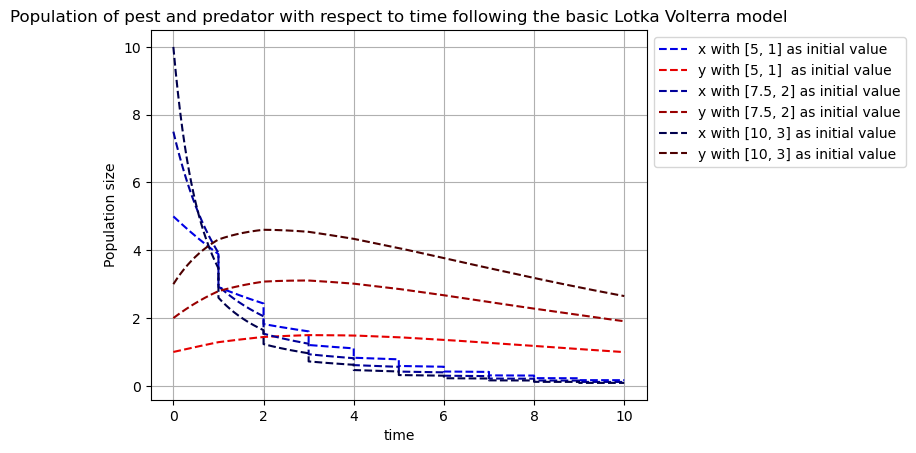

In [74]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a}  as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following the basic Lotka Volterra model')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

Some notes about the parameters.  
If $E$ is too small and $x$ is already near $0$, the graphs on the plot seem to be continuous.  
To avoid $x$ to decrease too fast, the search rate $a$ should be small because this model doesn't have an half-saturation constant.